In [ ]:
!pip install librosa scikit-learn matplotlib seaborn


In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = "/content/drive/My Drive/project.zip"
extract_path = "/content/project"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")


Extraction complete.


In [ ]:
# ‚úÖ Step 1: Install and Import Required Libraries
!pip install librosa --quiet

import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
# ‚úÖ Step 2: Extract Features (MFCCs) from GTZAN dataset

DATA_PATH = "/content/project"
genres = os.listdir(DATA_PATH)  # Assumes each folder is a genre (e.g., blues, classical, etc.)
X = []
y = []

for genre in genres:
    genre_folder = os.path.join(DATA_PATH, genre)
    for file in os.listdir(genre_folder):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_folder, file)
            try:
                signal, sr = librosa.load(file_path, duration=30)
                mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=20)
                mfcc_scaled = np.mean(mfcc.T, axis=0)
                X.append(mfcc_scaled)
                y.append(genre)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")


In [ ]:
import os

DATA_PATH = "/content/project"
genres = os.listdir(DATA_PATH)
print("Genres found:", genres)


Genres found: ['Data']


In [ ]:
import os

for root, dirs, files in os.walk("/content/project"):
    print("üìÇ Folder:", root)
    for d in dirs:
        print("    ‚îóüìÅ", d)
    for f in files[:5]:  # Print first few files
        print("    ‚îóüìÑ", f)


üìÇ Folder: /content/project
    ‚îóüìÅ Data
üìÇ Folder: /content/project/Data
    ‚îóüìÅ images_original
    ‚îóüìÅ genres_original
    ‚îóüìÑ features_30_sec.csv
    ‚îóüìÑ features_3_sec.csv
üìÇ Folder: /content/project/Data/images_original
    ‚îóüìÅ jazz
    ‚îóüìÅ country
    ‚îóüìÅ disco
    ‚îóüìÅ metal
    ‚îóüìÅ pop
    ‚îóüìÅ classical
    ‚îóüìÅ hiphop
    ‚îóüìÅ reggae
    ‚îóüìÅ blues
    ‚îóüìÅ rock
üìÇ Folder: /content/project/Data/images_original/jazz
    ‚îóüìÑ jazz00050.png
    ‚îóüìÑ jazz00053.png
    ‚îóüìÑ jazz00079.png
    ‚îóüìÑ jazz00024.png
    ‚îóüìÑ jazz00099.png
üìÇ Folder: /content/project/Data/images_original/country
    ‚îóüìÑ country00083.png
    ‚îóüìÑ country00052.png
    ‚îóüìÑ country00029.png
    ‚îóüìÑ country00010.png
    ‚îóüìÑ country00063.png
üìÇ Folder: /content/project/Data/images_original/disco
    ‚îóüìÑ disco00085.png
    ‚îóüìÑ disco00041.png
    ‚îóüìÑ disco00044.png
    ‚îóüìÑ disco00000.png
    ‚îóü

In [ ]:
import os

for root, dirs, files in os.walk("/content/project"):
    print("üìÅ", root)
    for d in dirs:
        print("   ‚îóüìÇ", d)
    for f in files[:5]:  # show only 5 files per folder
        print("   ‚îóüìÑ", f)


üìÅ /content/project
   ‚îóüìÇ Data
üìÅ /content/project/Data
   ‚îóüìÇ images_original
   ‚îóüìÇ genres_original
   ‚îóüìÑ features_30_sec.csv
   ‚îóüìÑ features_3_sec.csv
üìÅ /content/project/Data/images_original
   ‚îóüìÇ jazz
   ‚îóüìÇ country
   ‚îóüìÇ disco
   ‚îóüìÇ metal
   ‚îóüìÇ pop
   ‚îóüìÇ classical
   ‚îóüìÇ hiphop
   ‚îóüìÇ reggae
   ‚îóüìÇ blues
   ‚îóüìÇ rock
üìÅ /content/project/Data/images_original/jazz
   ‚îóüìÑ jazz00050.png
   ‚îóüìÑ jazz00053.png
   ‚îóüìÑ jazz00079.png
   ‚îóüìÑ jazz00024.png
   ‚îóüìÑ jazz00099.png
üìÅ /content/project/Data/images_original/country
   ‚îóüìÑ country00083.png
   ‚îóüìÑ country00052.png
   ‚îóüìÑ country00029.png
   ‚îóüìÑ country00010.png
   ‚îóüìÑ country00063.png
üìÅ /content/project/Data/images_original/disco
   ‚îóüìÑ disco00085.png
   ‚îóüìÑ disco00041.png
   ‚îóüìÑ disco00044.png
   ‚îóüìÑ disco00000.png
   ‚îóüìÑ disco00089.png
üìÅ /content/project/Data/images_original/metal
   ‚îóüìÑ 

In [ ]:
import os

print("Scanning '/content/project'...\n")
for root, dirs, files in os.walk("/content/project"):
    print("üìÅ FOLDER:", root)
    for d in dirs:
        print("   ‚îóüìÇ", d)
    for f in files[:5]:  # only show a few files
        print("   ‚îóüìÑ", f)
    print("-" * 40)


Scanning '/content/project'...

üìÅ FOLDER: /content/project
   ‚îóüìÇ Data
----------------------------------------
üìÅ FOLDER: /content/project/Data
   ‚îóüìÇ images_original
   ‚îóüìÇ genres_original
   ‚îóüìÑ features_30_sec.csv
   ‚îóüìÑ features_3_sec.csv
----------------------------------------
üìÅ FOLDER: /content/project/Data/images_original
   ‚îóüìÇ jazz
   ‚îóüìÇ country
   ‚îóüìÇ disco
   ‚îóüìÇ metal
   ‚îóüìÇ pop
   ‚îóüìÇ classical
   ‚îóüìÇ hiphop
   ‚îóüìÇ reggae
   ‚îóüìÇ blues
   ‚îóüìÇ rock
----------------------------------------
üìÅ FOLDER: /content/project/Data/images_original/jazz
   ‚îóüìÑ jazz00050.png
   ‚îóüìÑ jazz00053.png
   ‚îóüìÑ jazz00079.png
   ‚îóüìÑ jazz00024.png
   ‚îóüìÑ jazz00099.png
----------------------------------------
üìÅ FOLDER: /content/project/Data/images_original/country
   ‚îóüìÑ country00083.png
   ‚îóüìÑ country00052.png
   ‚îóüìÑ country00029.png
   ‚îóüìÑ country00010.png
   ‚îóüìÑ country00063.png
---

In [ ]:



X = []
y = []
failed_files = []
DATA_PATH = "/content/project/Data/genres_original"

for genre in os.listdir(DATA_PATH):
    genre_folder = os.path.join(DATA_PATH, genre)
    if os.path.isdir(genre_folder):
        for file in os.listdir(genre_folder):
            if file.endswith(".wav"):
                file_path = os.path.join(genre_folder, file)
                try:
                    signal, sr = librosa.load(file_path, duration=30)
                    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=20)
                    mfcc_scaled = np.mean(mfcc.T, axis=0)
                    X.append(mfcc_scaled)
                    y.append(genre)
                except Exception as e:
                    print(f"‚ùå Error: {file_path} ‚Äî {e}")
                    failed_files.append(file_path)

print(f"\n‚úÖ Finished! Extracted features from {len(X)} files. Skipped {len(failed_files)} bad files.")


<ipython-input-25-0a6a1ce38200>:13: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


‚ùå Error: /content/project/Data/genres_original/jazz/jazz.00054.wav ‚Äî 

‚úÖ Finished! Extracted features from 999 files. Skipped 1 bad files.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Label encode genres (e.g., "rock" ‚Üí 9)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to one-hot encoded labels
y_categorical = to_categorical(y_encoded)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

print("‚úÖ Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


‚úÖ Shapes:
X_train: (799, 20)
X_test: (200, 20)
y_train: (799, 10)
y_test: (200, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(256, input_shape=(20,), activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 genres
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_8 (Dense)                 ‚îÇ (None, 256)            ‚îÇ         5,376 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 256)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_9 (Dense)                 ‚îÇ (None, 128)            ‚îÇ        32,896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_10 (Dense)                ‚îÇ (None, 64)             ‚îÇ         8,256 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_11 (Dense)                ‚îÇ (None, 10)             ‚îÇ           650 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 47,178 (184.29 KB)

 Trainable params: 47,178 (184.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=37,
    batch_size=16,

)


Epoch 1/37
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.1361 - loss: 14.0670 - val_accuracy: 0.2600 - val_loss: 2.8641
Epoch 2/37
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.2271 - loss: 3.8206 - val_accuracy: 0.2700 - val_loss: 2.0807
Epoch 3/37
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.2037 - loss: 2.8594 - val_accuracy: 0.3100 - val_loss: 1.9399
Epoch 4/37
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.2778 - loss: 2.2174 - val_accuracy: 0.2900 - val_loss: 1.9336
Epoch 5/37
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.2675 - loss: 2.1683 - val_accuracy: 0.3250 - val_loss: 1.8629
Epoch 6/37
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.2678 - loss: 2.0590 - val_accuracy: 0.4000 - val_loss: 1.7613
Epo

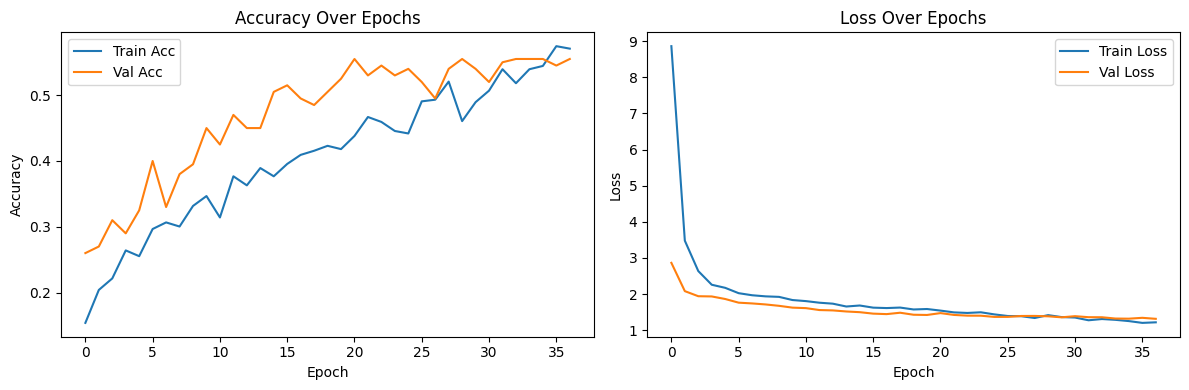

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

model.evaluate(X_test,y_test)

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 11ms/step - accuracy: 0.5950 - loss: 1.3031


[1.3139530420303345, 0.5550000071525574]

In [ ]:

model.save("genre_classification_model.h5")
print("‚úÖ Model saved as genre_classification_model.h5")


‚úÖ Model saved as genre_classification_model.h5


In [ ]:


import numpy as np

# Pick a random sample from test set
sample_idx = np.random.randint(0, len(X_test))
sample_input = X_test[sample_idx].reshape(1, -1)

# Predict
predicted_probs = model.predict(sample_input)
predicted_class = np.argmax(predicted_probs)

# Map back to genre name
predicted_genre = label_encoder.inverse_transform([predicted_class])[0]
true_genre = label_encoder.inverse_transform([np.argmax(y_test[sample_idx])])[0]

print(f"üé∂ Predicted Genre: {predicted_genre}")
print(f"‚úÖ Actual Genre: {true_genre}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 83ms/step
üé∂ Predicted Genre: country
‚úÖ Actual Genre: classical


7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step 


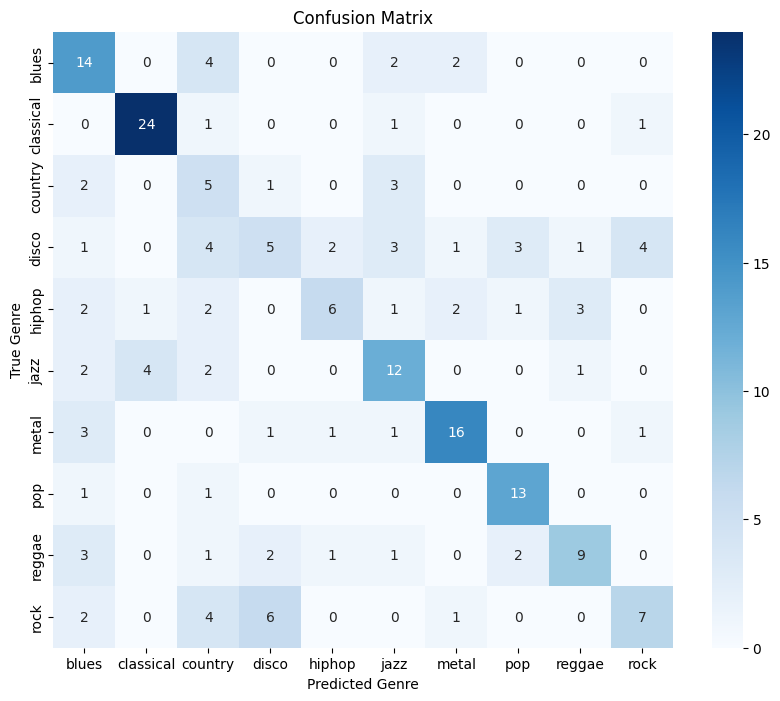

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predictions and labels back from one-hot
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
labels = label_encoder.classes_

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.title("Confusion Matrix")
plt.show()
